<a href="https://colab.research.google.com/github/SyedDanishKhurram/Machine-learning-/blob/main/titanic_Survival_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#**Data Analysis**

In [275]:
import pandas as pd

# URL for the Titanic dataset in CSV format
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Read the Titanic dataset into a pandas DataFrame
data = pd.read_csv(url)

# Display the DataFrame
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [276]:
data.ndim

2

In [277]:
df = pd.DataFrame(data)


In [278]:
df_1 = df.columns
df_1

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [279]:
#checking the empty space
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [280]:
#summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [281]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [282]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


#**Data Visualization**
Through matplotlib and seaborn

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

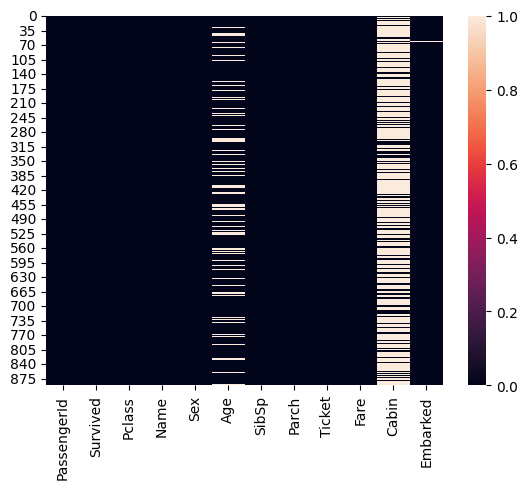

In [284]:

sns.heatmap(data.isnull())

<Axes: xlabel='Age', ylabel='Count'>

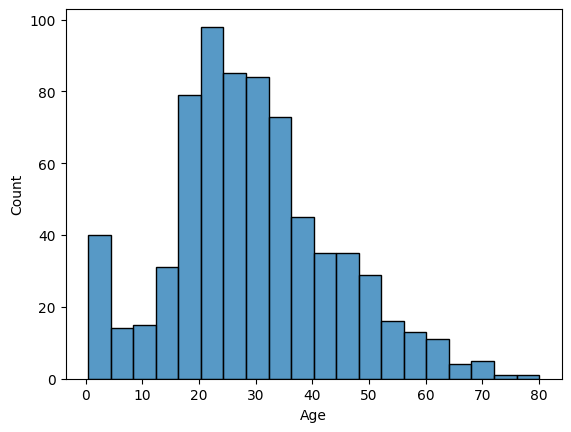

In [285]:
sns.histplot(data , x = 'Age')

<Axes: xlabel='Survived', ylabel='count'>

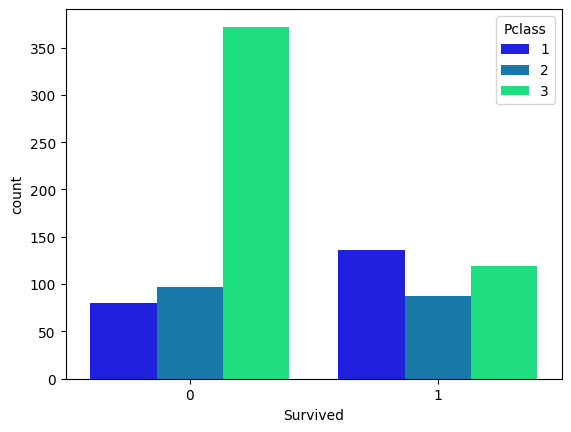

In [286]:
sns.countplot(data , x = 'Survived' , hue = 'Pclass' , palette = 'winter')


<Axes: xlabel='Sex', ylabel='count'>

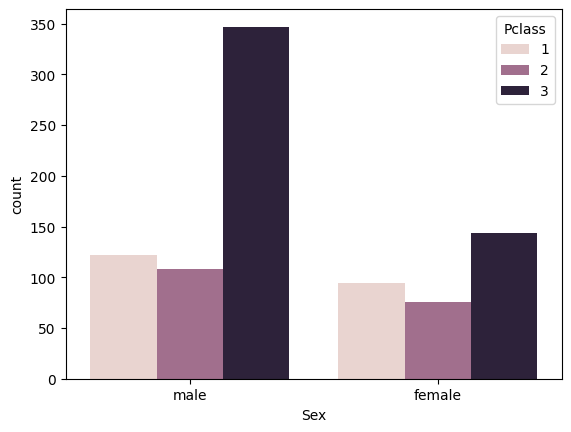

In [287]:
sns.countplot(data , x = 'Sex' , hue = 'Pclass')


In [288]:
# number of passengers survived and number of passengers dead
survival = df['Survived'].value_counts()

In [289]:
print("number of survived people:",survival[1])

number of survived people: 342


In [290]:
print("number of dead people:",survival[0])

number of dead people: 549


#**Data Cleaning**

In [291]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we will be checking what is important here and as we are only looking forward to see how many prediction is there on survival of the passenger keeping the usefull data and removing unnecessary data

In [292]:
data = df.drop(columns = ["PassengerId","Name","Ticket","Cabin"])

**Converting data**

Keeping all the numerical values in it only
and converting the non numerical value

In [293]:
data.Sex = (data['Sex'] == 'male' ).astype(int)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [294]:
embarked = {
    'Embarked': {'Q': 0, 'S': 1, 'C': 2}
}
data = data.replace(embarked)
data

<ipython-input-294-fa55db014ac8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(embarked)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1.0
887,1,1,0,19.0,0,0,30.0000,1.0
888,0,3,0,NaN,1,2,23.4500,1.0
889,1,1,1,26.0,0,0,30.0000,2.0


As we checked before there are 2 empty place
Age &
Embarked

In [295]:
#filling the value
data['Age'] = data['Age'].fillna(data['Age'].mean())
# filling the value of embarak
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mean())

In [296]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


**Scaling Data**

Scaling data means transforming numerical features to a common range to improve model performance and stability.using stanadar

In [297]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

scaler = MinMaxScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.5
1,1,0.0,0.0,0.472229,0.125,0.000000,0.139136,1.0
2,1,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.5
3,1,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.5
4,0,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.5
...,...,...,...,...,...,...,...,...
886,0,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.5
887,1,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.5
888,0,1.0,0.0,0.367921,0.125,0.333333,0.045771,0.5
889,1,0.0,1.0,0.321438,0.000,0.000000,0.058556,1.0


# **Algorithms**
# **Logistic Regression**
Logistic regression is used to predict binary outcome (0/1 or yes/no)


In [298]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

✔ Separates features (X) and target (Y).

✔ Splits dataset into training (75%) & testing (25%).

✔ Ensures data is shuffled for randomness.

In [299]:
#lets drop the survival columns to see if the model can detect how many survied
X = data.drop(columns=['Survived']) # X is the feature here

In [300]:
Y = data['Survived'] # Y is the target here

✅ test_size → Controls how much data goes into testing.

✅ random_state → Keeps the split consistent for reproducibility.

In [301]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 20)

In [302]:
X_train.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [303]:
from sklearn.metrics import confusion_matrix

# **Prediction**

In [304]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [305]:
y_pred = log_reg.predict(X_test)

In [306]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0])

In [307]:
confusion_matrix = confusion_matrix(y_pred, Y_test)
confusion_matrix

array([[123,  23],
       [ 19,  58]])

<Axes: >

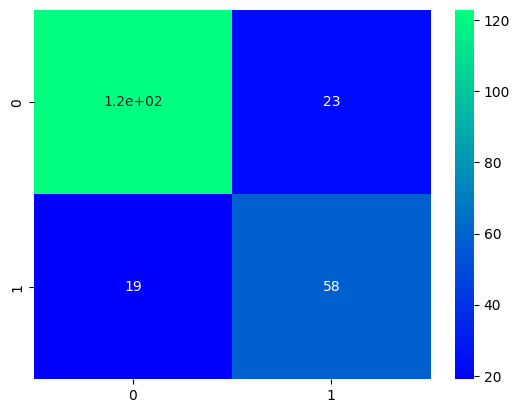

In [308]:
sns.heatmap(confusion_matrix, annot=True, cmap='winter')


In [309]:

accuracy = (confusion_matrix.diagonal().sum()) / (confusion_matrix.sum())
print(f'Accuracy: {accuracy}')

Accuracy: 0.8116591928251121
